In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy
import pickle
import os

In [2]:
r = 'gaussian.OpticsDesign/raw'
#r = 'replay.OpticsDesign/raw'
run = [f for f in sorted(os.listdir(r)) if os.path.isdir(r+'/'+f)][-1]
p = r+'/'+run
folder = f'{p}/source-OpticalPointSource/object-OpticalAbsorberGroup'
#folder = f'{p}/source-OpticalReplaySource/object-OpticalAbsorberGroup'

In [3]:
folder

'gaussian.OpticsDesign/raw/simulation-run-000000/source-OpticalPointSource/object-OpticalAbsorberGroup'

In [4]:
%ls {r}

simulation-run-000000/


In [5]:
results = []
for f in os.listdir(folder):
  with open(folder+'/'+f, 'rb') as _f:
    results.append(pickle.load(_f))

In [6]:
results[0].keys()

dict_keys(['source', 'obj', 'points', 'directions', 'powers', 'isEntering'])

In [7]:
points = concatenate([r['points'] for r in results])

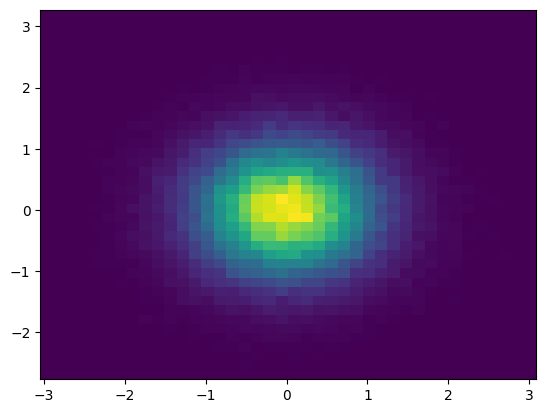

In [8]:
Hs, Xs, Ys, _ = hist2d(points[:,0], points[:,1], bins=40)#, norm='log')
savefig(f'gaussian-histogram.png')

In [9]:
gaussian = lambda X, A, s, x0: A*exp(-(X-x0)**2/s**2)

In [10]:
distance = 100
thetaSigma = sqrt(1e-4)

found sigma: 1.014, theoretical sigma: 1.000
found center: 0.237
found sigma: 0.992, theoretical sigma: 1.000
found center: 0.228


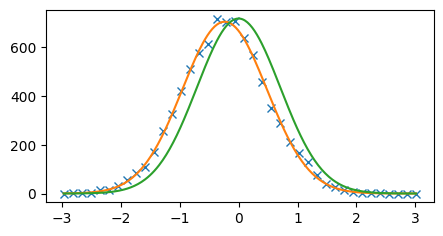

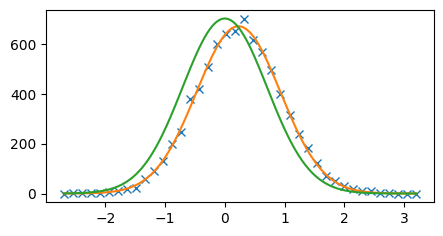

In [11]:
for i, (X, Y) in enumerate(
            [ ( (Xs[1:]+Xs[:-1])/2, Hs[argmin(abs(Ys)),:] ),
              ( (Ys[1:]+Ys[:-1])/2, Hs[:,argmin(abs(Xs))] ) ]):
  figure(figsize=(5,2.5))
  plot(X, Y, 'x')
  popt, _ = scipy.optimize.curve_fit(gaussian, X, Y, p0=(max(Y), 10, 0))
  Xlin = linspace(min(X), max(X), 300)
  Ylin = gaussian(Xlin, *popt)
  plot(Xlin, Ylin)
  plot(Xlin, gaussian(Xlin, max(Y), distance*thetaSigma, 0))
  print(f'found sigma: {abs(popt[1]):.3f}, theoretical sigma: {distance*thetaSigma:.3f}')
  print(f'found center: {abs(popt[-1]):.3f}')
  savefig(f'gaussian-histogram-{"xy"[i]}.png')